## Import packages

In [164]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

## Functions

In [155]:
def sigmoid(X, theta):
    z = np.dot(X, theta[1:]) + theta[0] 
    return 1.0 / ( 1.0 + np.exp(-z))

In [156]:
def binary_cross_entropy(y, hx):
    return -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))

In [157]:
def error_and_lost(x, theta, y):
    hx = sigmoid(x,theta)
    lost = binary_cross_entropy(y, hx)
    error = hx - y
    return error, lost

In [158]:
def SGD(x, y, theta, alpha, i):
    losts = []
    for i in range(i):
        error, lost = error_and_lost(x, theta, y)
        losts.append(lost)
        grad = x.T.dot(error)
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
    return losts, theta

In [168]:
def predict(x, theta):
    return np.where(sigmoid(x,theta) >= 0.5,1, 0)

In [169]:
def test(x,theta,y):
    correct = 0
    pred = predict(x, theta)
    for i in range(len(x)):
        if y[i] == pred[i]:
            correct += 1
    return correct/len(y)

#### This plot function is cited form github

In [190]:
def plot_test_result(test_x,test_y,X_std,theta, y, classifier, h=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min = x_std[:, 0].min() - 1
    x1_max = x_std[:, 0].max() + 1
    x2_min = x_std[:, 1].min() - 1
    x2_max = x_std[:, 1].max() + 1
    
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T,theta)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(test_y)):
        plt.scatter(x=test_x[test_y == cl, 0], y=test_x[test_y == cl, 1],
                    alpha=0.9, c=cmap(idx),
                    marker=markers[idx], label=cl)

## Load data 

In [179]:
iris = load_iris()
y=(iris.target == 2)*1
x=iris.data[:, [2,3]]

## Normalize input

In [180]:
x_nor = np.copy(x)
x_nor[:,0] = (x_nor[:,0] - x_nor[:,0].mean()) / x_nor[:,0].std()
x_nor[:,1] = (x_nor[:,1] - x_nor[:,1].mean()) / x_nor[:,1].std()

## Split data into training data and test data

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x_nor,y,test_size = 0.2)

## Training & Test

In [182]:
theta = np.zeros(3)
alpha = 0.01
i = 5000

lost, Theta = SGD(x_train,y_train, theta, alpha, i)
accuracy = test(x_test, Theta, y_test)

## Print Coefficients and Accuracy
## Plot the value of the Loss Function for each iteration

Text(0, 0.5, 'lost')

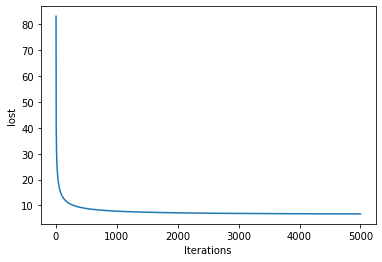

In [187]:
plt.plot(range(1, i+1), lost)
plt.xlabel('Iterations')
plt.ylabel('lost')

## print Coefficient and Accuract

In [184]:
print ('\n Coefficients :', theta[0], theta[1], theta[2])
print ("\n Accuracy: ", accuracy)


 Coefficients : -11.369794875760222 10.58302992387008 7.879625006620604

 Accuracy:  0.9333333333333333


## Plot the trained classifier overlaid on the input data. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


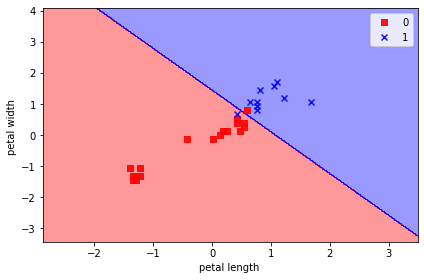

In [191]:
plot_test_result(x_test, y_test, x_train, theta, y_train, classifier=predict)
plt.xlabel('petal length ')
plt.ylabel('petal width ')
plt.legend(loc='upper right')
plt.tight_layout()